# Project Title : Predict Taxi trip duration


# Importing necessary libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import math
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings("ignore")

In [3]:
!pip install geopy

Defaulting to user installation because normal site-packages is not writeable


# Importing the Dataset

In [4]:
df=pd.read_csv('C:\\Users\\VAISHNAVI\\Downloads\\Taxi Trip Duration.csv')

# Exploring the Dataset (EDA)

In [5]:

df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


In [6]:
df.shape

(1458644, 11)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 11 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   id                  1458644 non-null  object 
 1   vendor_id           1458644 non-null  int64  
 2   pickup_datetime     1458644 non-null  object 
 3   dropoff_datetime    1458644 non-null  object 
 4   passenger_count     1458644 non-null  int64  
 5   pickup_longitude    1458644 non-null  float64
 6   pickup_latitude     1458644 non-null  float64
 7   dropoff_longitude   1458644 non-null  float64
 8   dropoff_latitude    1458644 non-null  float64
 9   store_and_fwd_flag  1458644 non-null  object 
 10  trip_duration       1458644 non-null  int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 122.4+ MB


# Understanding Variables

In [8]:
# Dataset Columns
df.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration'],
      dtype='object')

# Column Details
Id: A unique identifier for each trip

Vendor Id: A unique identifier for vendor

Pickup Datetime: Date and time of pickup

Dropoff Datetime: Date and time of dropoff

Passenger Count: The number of passengers in the vehicle (driver entered value)

Pickup Longitude: The longitude where the meter was engaged

Pickup Latitude: The latitude where the meter was engaged

Dropoff Longitude: The longitude where the meter was disengaged

Dropoff Latitude: The latitude where the meter was disengaged

Store and Fwd Flag: This flag indicates whether the trip record was held in vehicle memory before sending to the vendor because the vehicle did not have a connection to the server - Y=store and forward; N=not a store and forward trip.

Trip Duration: Duration of time in seconds

In [9]:
#statistical summary of our dataset.
df.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06
mean,1.534950e+00,1.664530e+00,-7.397349e+01,4.075092e+01,-7.397342e+01,4.075180e+01,9.594923e+02
std,4.987772e-01,1.314242e+00,7.090186e-02,3.288119e-02,7.064327e-02,3.589056e-02,5.237432e+03
min,1.000000e+00,0.000000e+00,-1.219333e+02,3.435970e+01,-1.219333e+02,3.218114e+01,1.000000e+00
25%,1.000000e+00,1.000000e+00,-7.399187e+01,4.073735e+01,-7.399133e+01,4.073588e+01,3.970000e+02
50%,2.000000e+00,1.000000e+00,-7.398174e+01,4.075410e+01,-7.397975e+01,4.075452e+01,6.620000e+02
75%,2.000000e+00,2.000000e+00,-7.396733e+01,4.076836e+01,-7.396301e+01,4.076981e+01,1.075000e+03
max,2.000000e+00,9.000000e+00,-6.133553e+01,5.188108e+01,-6.133553e+01,4.392103e+01,3.526282e+06


# Data Conversion

In [10]:
# converting into proper date format
df["pickup_datetime"]=pd.to_datetime(df["pickup_datetime"])
df["dropoff_datetime"]=pd.to_datetime(df["dropoff_datetime"])
df["dropoff_datetime"].dtypes

dtype('<M8[ns]')

In [11]:
# finding pickup and drop month
df["pickup_month"]=df["pickup_datetime"].dt.month
df["dropoff_month"]=df["dropoff_datetime"].dt.month
     

In [12]:
#finding pickup and drop 
df["pickup_date"]=df["pickup_datetime"].dt.day
df["dropoff_date"]=df["dropoff_datetime"].dt.day

In [13]:
# Creating pickup and dropoff weekdays
df['pickup_weekday'] =df['pickup_datetime'].dt.weekday
df['dropoff_weekday']=df['dropoff_datetime'].dt.weekday

In [14]:
# Creating pickup and dropoff hours
df['pickup_hour'] = df['pickup_datetime'].dt.hour
df['dropoff_hour'] =df['dropoff_datetime'].dt.hour

In [15]:
#creating pickup and dropoff day name
df['pickup_day']=df['pickup_datetime'].dt.day_name()
df['dropoff_day']=df['dropoff_datetime'].dt.day_name()

In [16]:
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,...,pickup_month,dropoff_month,pickup_date,dropoff_date,pickup_weekday,dropoff_weekday,pickup_hour,dropoff_hour,pickup_day,dropoff_day
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,...,3,3,14,14,0,0,17,17,Monday,Monday
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,...,6,6,12,12,6,6,0,0,Sunday,Sunday
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,...,1,1,19,19,1,1,11,12,Tuesday,Tuesday
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,...,4,4,6,6,2,2,19,19,Wednesday,Wednesday
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,...,3,3,26,26,5,5,13,13,Saturday,Saturday


In [17]:
# calculate trip duration in minute
df["trip_duration_in_minute"]=df["trip_duration"]/60

In [18]:
# calculate the distance by given geospatial co ordinate in kilometer
from geopy.distance import great_circle
  
df['distance'] = df.apply(lambda row: great_circle((row['pickup_latitude'], row["pickup_longitude"]), (row['dropoff_latitude'], row['dropoff_longitude'])).kilometers, axis=1)


# Data Visualization

In [19]:
# percentage of trip by vendor
percentage_of_vend_1=round(len(df[df["vendor_id"]==1])/len(df)*100,1)
percentage_of_vend_2=round(len(df[df["vendor_id"]==2])/len(df)*100,1)
total_percentage=[percentage_of_vend_1,percentage_of_vend_2]
total_percentage
     

[46.5, 53.5]

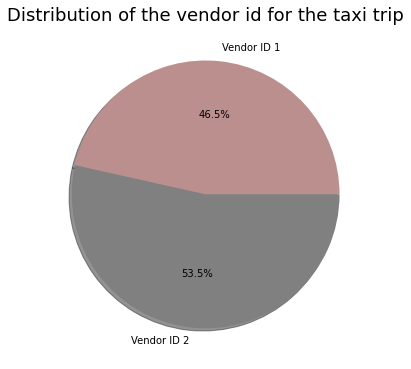

In [20]:
plt.figure(figsize = (6,8))
c=['rosybrown','gray']
plt.pie(total_percentage, labels = ['Vendor ID 1','Vendor ID 2'],autopct='%.1f%%',colors=c,shadow=True)
plt.title('Distribution of the vendor id for the taxi trip',fontsize=18)
plt.show()

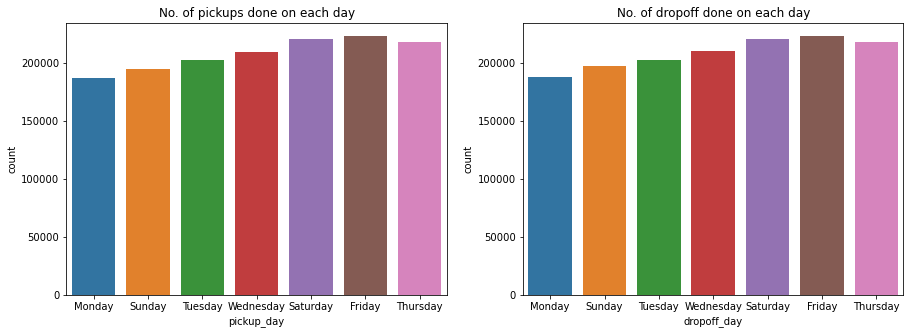

In [21]:
##Number of Pickups and Dropoff on each day of the week
figure,ax=plt.subplots(nrows=1,ncols=2,figsize=(15,5))
sns.countplot(x="pickup_day",data=df,ax=ax[0])
ax[0].set_title('No. of pickups done on each day')
sns.countplot(x="dropoff_day",data=df,ax=ax[1])
ax[1].set_title('No. of dropoff done on each day')
plt.show()

Above plots interpret that in a week, "friday", and "saturday" have higher number of pickups and dropoffs.

We can see that compared to other days, taxi booking rates are higher on the weekends ( Friday and Saturday).This suggests that individuals used to go out on weekends for their celebrations, parties, or even other personnel work.

In [22]:
# diving the time in to different timezone
def timezone(x):
  if x>=6 and x<10:
    return "morning"
  elif x>=10 and x<16:
    return "mid day"  
  elif x>=16 and x<22:
    return "evevning" 
  elif x>=22 or x<6:
    return "late night"  
     

In [23]:
#apply that function
df["pickup_time_zone"]=df.pickup_hour.apply(timezone)
df["dropoff_time_zone"]=df.dropoff_hour.apply(timezone)

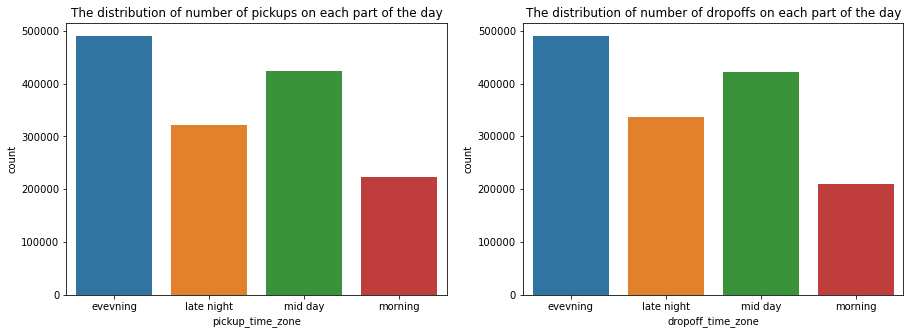

In [24]:
# Distribution of the no of Pickups and Dropoffs in a day
figure,ax=plt.subplots(nrows=1,ncols=2,figsize=(15,5))
sns.countplot(x='pickup_time_zone',data=df,ax=ax[0])
ax[0].set_title('The distribution of number of pickups on each part of the day')
sns.countplot(x='dropoff_time_zone',data=df,ax=ax[1])
ax[1].set_title('The distribution of number of dropoffs on each part of the day')
plt.show()

we can see that evening is the busiet time of whole day. people take the taxi to come fro office and going for party at evening and dinner. after that at mid day maximum ride taken because people were going to office after 10 am.

In [25]:
# divide trip duration in differnt bins 
labels=['less then 1min','within 10 mins','within 30 mins','within hour','within day','within two days','more then two day']

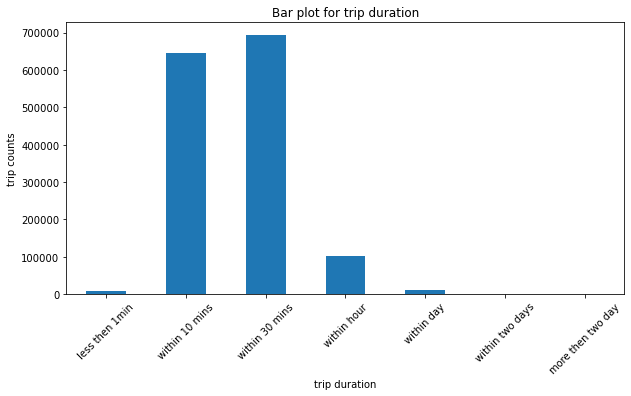

In [26]:
plt.figure(figsize=[10,5])
df1=pd.cut(df['trip_duration_in_minute'],bins=[0,1,10,30,60,1440,1440*2,50000],labels=labels)
df.groupby(df1)['trip_duration_in_minute'].count().plot(kind='bar')
plt.title("Bar plot for trip duration")
plt.ylabel("trip counts")
plt.xlabel("trip duration")
plt.xticks(rotation=45)
plt.show()
     

By above chart we can see that most of trip duration 10 to 30 minute. some trip also goes on hourly.long trip with in day very rare.

# Heatmap

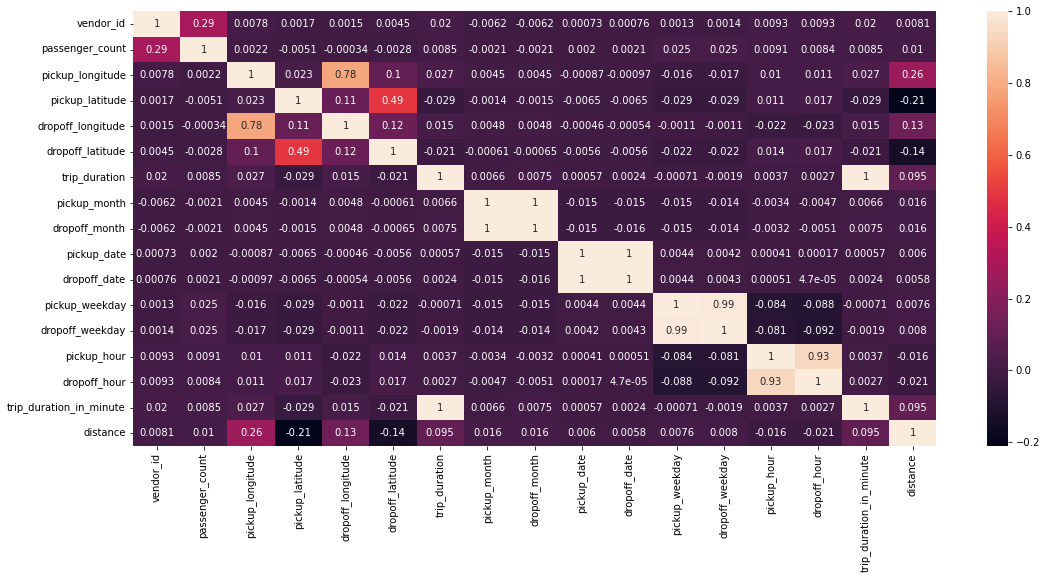

In [27]:
plt.figure(figsize=(18,8))
correlation=df.corr()
sns.heatmap(correlation,annot=True)
plt.show()

By above haetmap it visulaize that pickup_month and dropp off month is 100% correlated.Along with pickup hour ,dropoff hour,pickup weekday and dropoff week day,trip duration and trip duration in minute are highly correlated.

In [28]:
def correlated (dataset,thresold):
  corr_column=set()    # all the highly corelated column
  for i in range(len(correlation.columns)):
      for j in range(i):
        if abs(correlation.iloc[i,j])>=thresold:  # we want absolute value
          column_name=correlation.columns[i]      # getting the name of columns
          corr_column.add(column_name)            # add he name column in empty set
  return corr_column        

In [29]:
# Calling the function with threshold value 0.90
highly_correlated_features=correlated(df,0.90)
print('total highly correlated features:',len(set(highly_correlated_features)))

total highly correlated features: 5


In [30]:
highly_correlated_features

{'dropoff_date',
 'dropoff_hour',
 'dropoff_month',
 'dropoff_weekday',
 'trip_duration_in_minute'}

by above evaluation we can say that there are four column they are highly correlated above 90%.

it better to drop higly correlated features for better performance.

# checking skewness of target variable

Text(0.5, 1.0, 'distribution after applying log transformation')

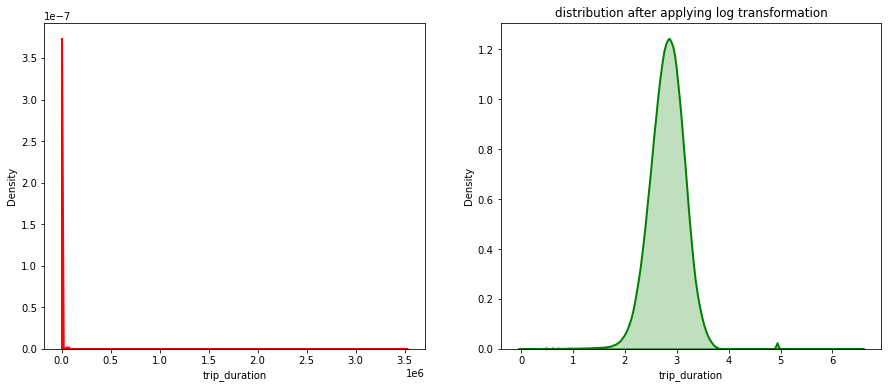

In [31]:
# dist plot of trip duration.
fig,ax=plt.subplots(nrows=1,ncols=2,figsize=(15,6))
sns.distplot(df.trip_duration,color='red',ax=ax[0],hist=False,kde_kws= {'shade':True, 'linewidth':2})
sns.distplot(np.log10(df["trip_duration"]),color='green',ax=ax[1],hist= False,kde= True,kde_kws= {'shade':True, 'linewidth':2})
ax[1].set_title("distribution after applying log transformation")

BY above distribution we can see that target variable is higly right skewed .to remove the skewness we apply log transformation.after transformation we found normal distribution of targer variable.

# Outlier Removal (Quartile Method)

<AxesSubplot:xlabel='distance'>

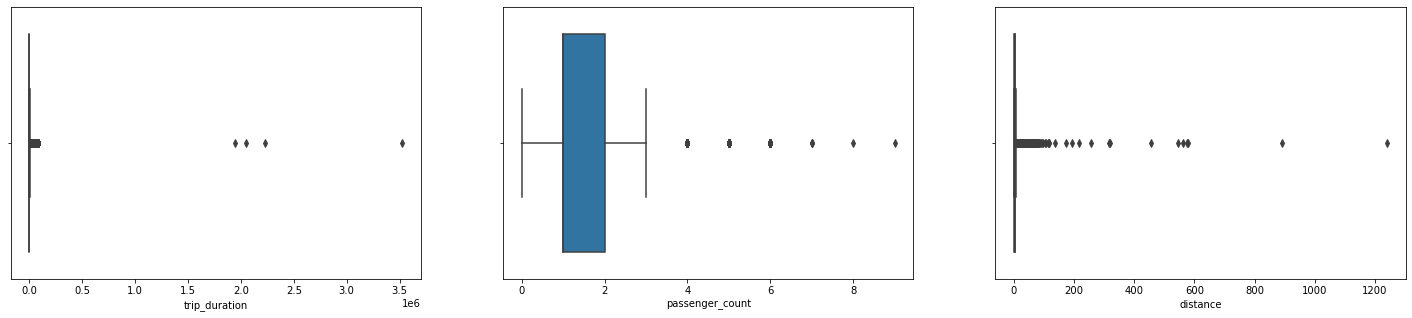

In [32]:
#boxplot for visualizing for outliers
fig,ax=plt.subplots(nrows=1,ncols=3,figsize=(25,5))
sns.boxplot(df["trip_duration"],ax=ax[0])
sns.boxplot(df['passenger_count'],ax=ax[1])
sns.boxplot(df['distance'],ax=ax[2])

In [33]:
#finding differnt quarters of trip_duration column
trip_duration_Q1=df['trip_duration'].quantile(0.25)
print('first quartile value ie 25th percentile of trip duration:',trip_duration_Q1)
trip_duration_Q2=df['trip_duration'].quantile(0.50)
print('second quartile value ie 50th percentile of trip duration:',trip_duration_Q2)
trip_duration_Q3=df['trip_duration'].quantile(0.75)
print('third quartile value ie 75th percentile of trip duration:',trip_duration_Q2)

first quartile value ie 25th percentile of trip duration: 397.0
second quartile value ie 50th percentile of trip duration: 662.0
third quartile value ie 75th percentile of trip duration: 662.0


In [34]:
# calculate interquartile range
IQR=trip_duration_Q3-trip_duration_Q1
print('IQR:',IQR)
trip_duration_lower_limit=trip_duration_Q1-1.5*IQR
trip_duration_upper_limit=trip_duration_Q3+1.5*IQR
print('The lower limit of trip duration:',trip_duration_lower_limit)
print('The upper limit of trip duration:',trip_duration_upper_limit)

IQR: 678.0
The lower limit of trip duration: -620.0
The upper limit of trip duration: 2092.0


In [35]:
#removing outliers in trip_duration features
df=df[df['trip_duration']>0]
df=df[df['trip_duration']<trip_duration_upper_limit]

In [36]:
df.shape

(1384320, 25)

In [37]:
#finding differnt quarters of passenger_count column
passenger_count_Q1=df['passenger_count'].quantile(0.25)
print('first quartile value ie 25th percentile of passenger count:',passenger_count_Q1)
passenger_count_Q2=df['passenger_count'].quantile(0.50)
print('second quartile value ie 50th percentile of passenger count:',passenger_count_Q2)
passenger_count_Q3=df['passenger_count'].quantile(0.75)
print('third quartile value ie 75th percentile of passenger count:',passenger_count_Q3)

first quartile value ie 25th percentile of passenger count: 1.0
second quartile value ie 50th percentile of passenger count: 1.0
third quartile value ie 75th percentile of passenger count: 2.0


In [38]:
# Calculating IQR
IQR= passenger_count_Q3 - passenger_count_Q1
passenger_count_lower_limit=passenger_count_Q1 - 1.5*IQR
passenger_count_upper_limit=passenger_count_Q3 + 1.5*IQR
print("The lower limit of passenger count:", passenger_count_lower_limit)
print("The upper limit of passenger count:", passenger_count_upper_limit)

The lower limit of passenger count: -0.5
The upper limit of passenger count: 3.5


In [39]:
# Removing outliers
df=df[df['passenger_count']>0]
df=df[df['passenger_count']<passenger_count_upper_limit]


In [40]:
df.shape

(1237987, 25)

In [41]:
#finding differnt quarters of distance column
distance_Q1=df['distance'].quantile(0.25)
print('first quartile value ie 25th percentile of distance:',distance_Q1)
distance_Q2=df['distance'].quantile(0.50)
print('second quartile value ie 50th percentile of distance:',distance_Q2)
distance_Q3=df['distance'].quantile(0.75)
print('third quartile value ie 75th percentile of distance:',distance_Q3)

first quartile value ie 25th percentile of distance: 1.1974971201206936
second quartile value ie 50th percentile of distance: 1.9919619004442215
third quartile value ie 75th percentile of distance: 3.4835674136716936


In [42]:
# Calculating IQR
IQR= distance_Q3 - distance_Q1
distance_lower_limit=distance_Q1 - 1.5*IQR
distance_upper_limit=distance_Q3 + 1.5*IQR
print("The lower limit of distance:", distance_lower_limit)
print("The upper limit of distance:", distance_upper_limit)

The lower limit of distance: -2.2316083202058064
The upper limit of distance: 6.912672853998194


In [43]:
# Removing outliers
df=df[df['distance']>0]
df=df[df['distance']<distance_upper_limit]

In [44]:
df.shape

(1136749, 25)

<AxesSubplot:xlabel='trip_duration', ylabel='Density'>

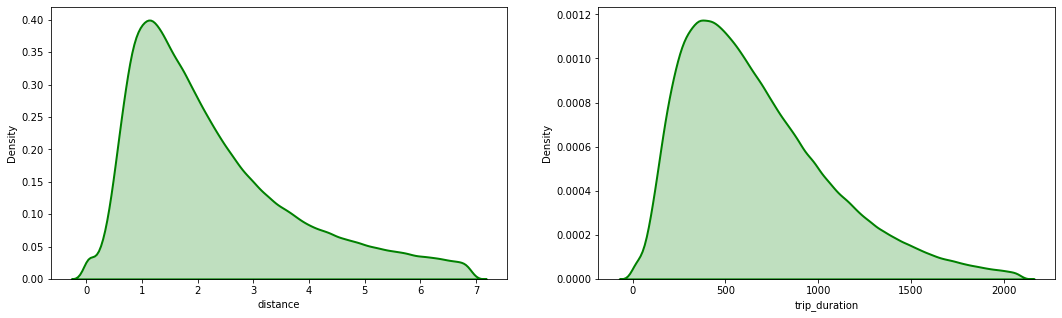

In [45]:
# Earlier we saw that distance and tripduration had highly skewed graph... lets check the distribution again
figure, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (18,5))
sns.distplot(df['distance'], hist=False, kde=True, kde_kws= {'shade':True, 'linewidth':2}, color="green", ax=ax[0])
sns.distplot(df['trip_duration'], hist=False, kde=True, kde_kws= {'shade':True, 'linewidth':2}, color="green", ax=ax[1])
     

# ONE HOT ENCODING

In [46]:
#add dummy variable to convert textual data to numerical data through one hot encoding
df=pd.get_dummies(df,columns=['store_and_fwd_flag', 'pickup_weekday', 'dropoff_weekday'],drop_first=True)

In [47]:
df.shape

(1136749, 35)

In [48]:
features=['vendor_id', 'passenger_count', 'distance', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag_Y','pickup_weekday_1', 
          'pickup_weekday_2', 'pickup_weekday_3', 'pickup_weekday_4', 'pickup_weekday_5', 'pickup_weekday_6']

In [49]:
final_df=df[features]
final_df.shape
     

(1136749, 14)

# Model Implimantation

Evaluating which model is better. Therefore we will be calculating evaluation metrics for different models

In [50]:
# define a  function to calculate evaluation metrics
def evaluation_metrics (x_train,y_train,y_predicted):
  MSE=round(mean_squared_error(y_true=y_train, y_pred=y_predicted),4)
  RMSE=math.sqrt(MSE)
  R2_score=r2_score(y_true=y_train, y_pred=y_predicted)
  Adjusted_R2_score=1-((1-( R2_score))*(x_train.shape[0]-1)/(x_train.shape[0]-x_train.shape[1]-1))

  print("Mean Squared Error:",MSE,"Root Mean Squared Error:", RMSE)
  print("R2 Score :",R2_score,"Adjusted R2 Score :",Adjusted_R2_score)
  # plotting actual and predicted values
  #Plotting Actual and Predicted Values
  plt.figure(figsize=(18,6))
  plt.plot((y_predicted)[:100], color='red') 
  plt.plot(np.array(y_train)[:100], color='green')
  plt.legend(["Predicted","Actual"])
  plt.title('Actual and Predicted Time Duration')

  #return(MSE,RMSE,R2_score,Adjusted_R2_score)

In [51]:
x=final_df[features]
y=df["trip_duration_in_minute"]

In [52]:
# Importing train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
     

# Linear Regression

In [53]:
lr=LinearRegression()
lr.fit(x_train,y_train)
a=lr.score(x_train, y_train)
y_pred_train = lr.predict(x_train)
y_pred_test = lr.predict(x_test)

Mean Squared Error: 22.5249 Root Mean Squared Error: 4.746040454947682
R2 Score : 0.48710009447510005 Adjusted R2 Score : 0.4870921983622618


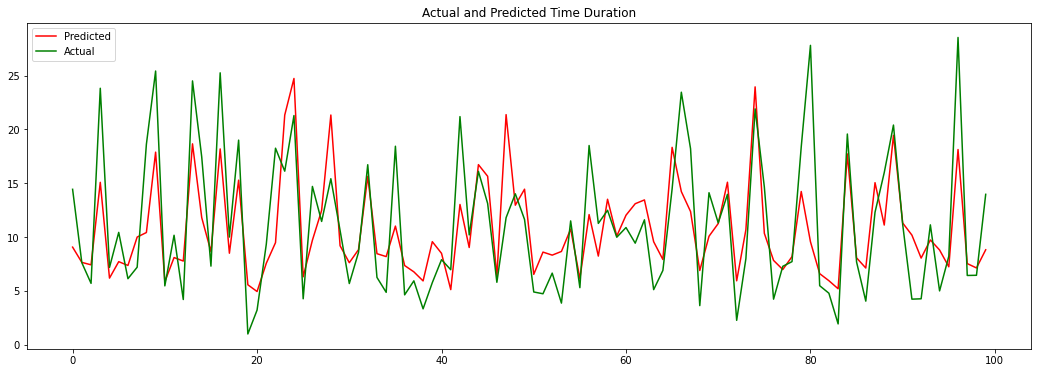

In [54]:
# evaluation metrics for train data set
evaluation_metrics(x_train,y_train,y_pred_train)

Mean Squared Error: 22.4453 Root Mean Squared Error: 4.737647095341737
R2 Score : 0.4888535840079219 Adjusted R2 Score : 0.48882210601366727


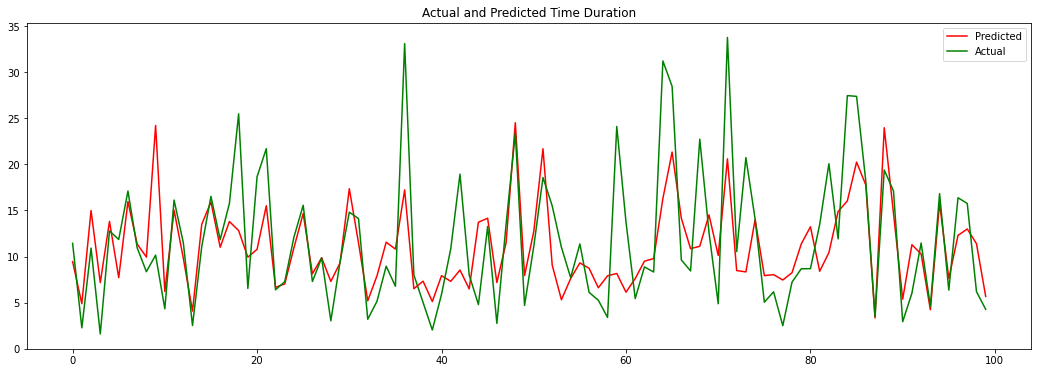

In [55]:
# evaluation metrics for test data set
evaluation_metrics(x_test,y_test,y_pred_test)

# Random Forest

In [56]:
RFR=RandomForestRegressor()

In [57]:
# number of trees in random forest
n_estimators=[20,22,24]
#number of feature to consider at every split
max_features=[0.6]
# maximum number of level in trees
max_depth=[10,16] 
#number of samples
max_samples=[0.75,1.0]

# Hyperparameter Grid
param_grid={'n_estimators':n_estimators,
            'max_features':max_features,
            'max_depth':max_depth,
            'max_samples':max_samples,
            }
print(param_grid)


{'n_estimators': [20, 22, 24], 'max_features': [0.6], 'max_depth': [10, 16], 'max_samples': [0.75, 1.0]}


In [58]:
RF_grid=GridSearchCV(estimator=RFR,param_grid=param_grid,cv=2,verbose=2)

In [59]:
RF_grid.fit(x_train,y_train)

Fitting 2 folds for each of 12 candidates, totalling 24 fits
[CV] END max_depth=10, max_features=0.6, max_samples=0.75, n_estimators=20; total time=  23.0s
[CV] END max_depth=10, max_features=0.6, max_samples=0.75, n_estimators=20; total time=  22.1s
[CV] END max_depth=10, max_features=0.6, max_samples=0.75, n_estimators=22; total time=  26.4s
[CV] END max_depth=10, max_features=0.6, max_samples=0.75, n_estimators=22; total time=  25.5s
[CV] END max_depth=10, max_features=0.6, max_samples=0.75, n_estimators=24; total time=  25.0s
[CV] END max_depth=10, max_features=0.6, max_samples=0.75, n_estimators=24; total time=  23.2s
[CV] END max_depth=10, max_features=0.6, max_samples=1.0, n_estimators=20; total time=  23.0s
[CV] END max_depth=10, max_features=0.6, max_samples=1.0, n_estimators=20; total time=  22.9s
[CV] END max_depth=10, max_features=0.6, max_samples=1.0, n_estimators=22; total time=  24.7s
[CV] END max_depth=10, max_features=0.6, max_samples=1.0, n_estimators=22; total time= 

GridSearchCV(cv=2, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [10, 16], 'max_features': [0.6],
                         'max_samples': [0.75, 1.0],
                         'n_estimators': [20, 22, 24]},
             verbose=2)

In [60]:
RF_grid.best_params_

{'max_depth': 16, 'max_features': 0.6, 'max_samples': 1.0, 'n_estimators': 24}

In [61]:
RF_grid.best_score_


0.6016394473399167

In [62]:
Random_Forest_optimal_model =RF_grid.best_estimator_
y_predict_train_Random_Forest=Random_Forest_optimal_model.predict(x_train)
y_predict_test_Random_Forest=Random_Forest_optimal_model.predict(x_test)

Mean Squared Error: 14.3639 Root Mean Squared Error: 3.7899736146838805
R2 Score : 0.672929019782534 Adjusted R2 Score : 0.6729239845128097


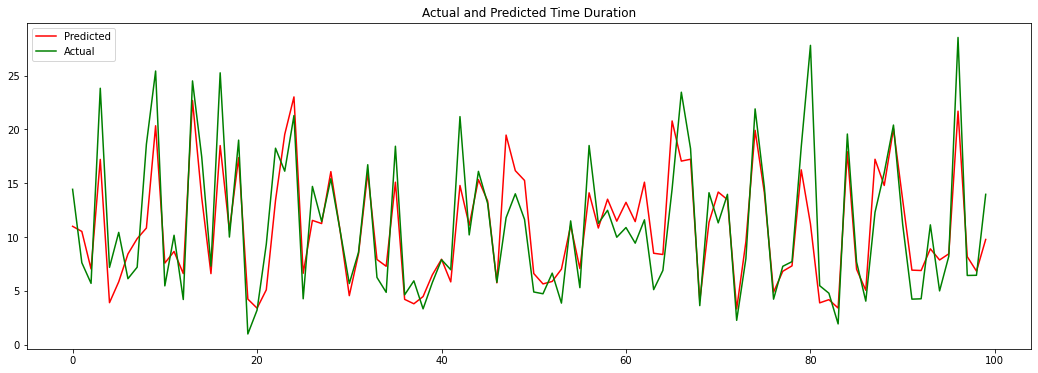

In [63]:
# evaluation metrics for train data set
evaluation_metrics(x_train,y_train,y_predict_train_Random_Forest)

Mean Squared Error: 17.107 Root Mean Squared Error: 4.1360609279844995
R2 Score : 0.6104221693363264 Adjusted R2 Score : 0.6103981779156069


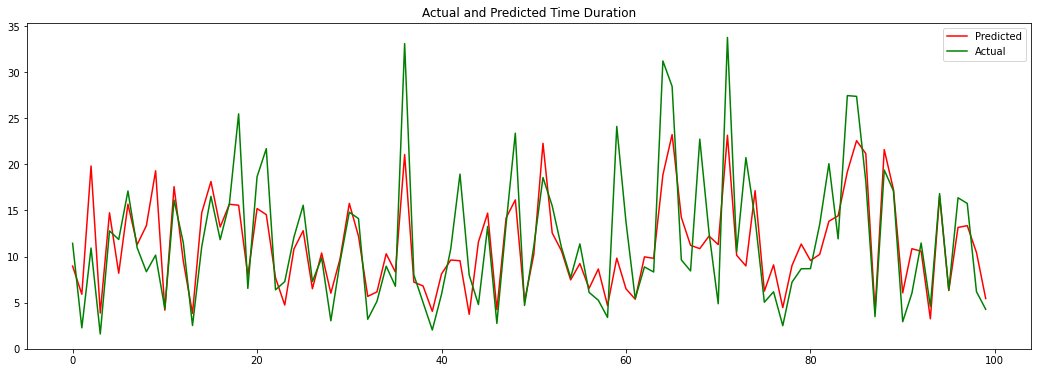

In [64]:
# evaluation metrics for test data set
evaluation_metrics(x_test,y_test,y_predict_test_Random_Forest)

# Thank You